# PROBLEM STATEMENT

A start-up is interested in running targeted marketing ads on facebook. The company wants to anaylze customer behavior by predicting which customer clicks on the advertisement. Customer data is as follows: 

Inputs: 
- Name 
- e-mail 
- Country 
- Time on Facebook 
- Estimated Salary (derived from other parameters)

Outputs:
- Click (1: customer clicked on Ad, 0: Customer did not click on the Ad)

# STEP #0:  IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #1: IMPORT DATASET

In [53]:
fb_df = pd.read_csv('Facebook_Ads_2.csv', encoding='ISO-8859-1')

In [ ]:
# lOOK AT FIRST FEW ROWS OF DATAFRAME TO GET FAMILIAR WITH DATA

In [54]:
fb_df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [ ]:
# LOOK AT LAST FEW ROWS TO CONFIRM NUMBER OF RECORDS

In [6]:
fb_df.tail()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,32.386148,74331.35442,1


# STEP #2: EXPLORE/VISUALIZE DATASET

In [ ]:
# ISOLATE CUSTOMERS THAT CLICKED AND DIDN'T CLICK ON AD

In [12]:
click    = fb_df[fb_df['Clicked']==1]
no_click = fb_df[fb_df['Clicked']==0]

In [ ]:
# SUMMARIZE BASIC STATISTICS (PORTION THAT CLICKED, ETC.)

In [13]:
print("Total =", len(training_set))

print("Number of customers who clicked on Ad =", len(click))
print("Percentage Clicked =",1.* len(click)/len(fb_df)*100.0, "%")
 
print("Did not Click =", len(no_click))
print("Percentage who did not Click =", 1.*len(no_click)/len(fb_df)*100.0, "%")

Total = 499
Number of customers who clicked on Ad = 250
Percentage Clicked = 50.1002004008016 %
Did not Click = 249
Percentage who did not Click = 49.899799599198396 %


In [ ]:
# VISUALIZE DATA TO SEE DISTINCT POPULATIONS OF THOSE WHO CLICKED AND DIDN'T CLICK ON AN AD

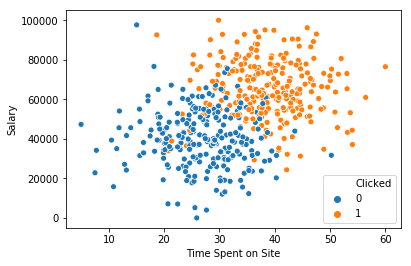

In [14]:
sns.scatterplot(x=fb_df['Time Spent on Site'], y = fb_df['Salary'], hue = fb_df['Clicked'])

In [ ]:
# CHECK OUT MEAN SALARY FOR THOSE WHO CLICKED VS THOSE THAT DIDNT' CLICK TO SEE IF SALARY COULD BE A CONTRIBUTING FACTOR

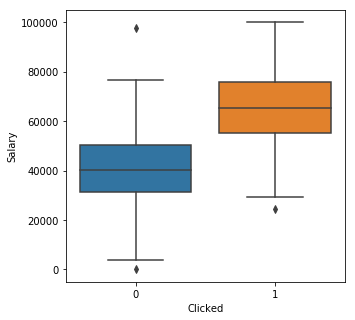

In [21]:
plt.figure(figsize=(5,5))
sns.boxplot(x=fb_df['Clicked'], y=fb_df['Salary'])

In [ ]:
# LOOK AT MEAN TIME SPENT ON SITE TO SEE FOR BOTH POPULATIONS TO SEE IF IT COULD ALSO HAVE BEEN A CONTRIBUTING FEATURE

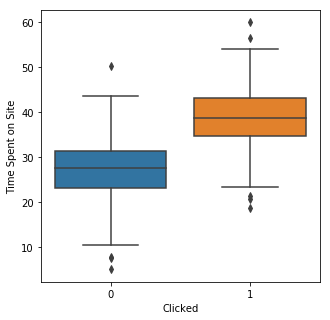

In [22]:
plt.figure(figsize=(5,5))
sns.boxplot(x=fb_df['Clicked'], y=fb_df['Time Spent on Site'])

In [ ]:
# lOOK AT DISTRIBUTION OF SALARY ACROSS THE ENTIRE DATASET. MOST OF THE CUSTOMERS HAVE A SALARY BETWEEN $30k - $80k

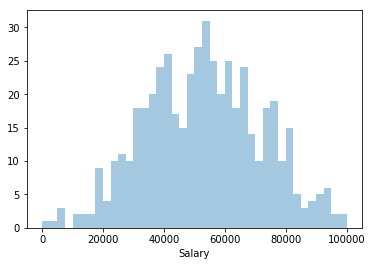

In [27]:
sns.distplot(fb_df['Salary'], bins = 40, kde=False)

#Could also do fb_df['Salary'].hist(bins=40)

In [ ]:
# EXAMINED THE OVERALL DISTRIBUTION OF TIME SPENT ON SITE, TOO, REVEALING MOST PEOPLE SPENT BETWEEN 25 - 45 MINUTES ON FACEBOOK

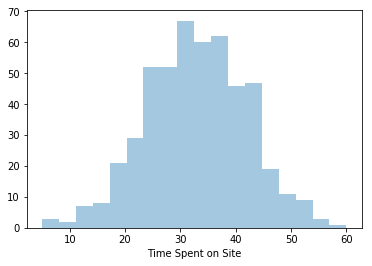

In [29]:
sns.distplot(fb_df['Time Spent on Site'], kde=False)

# STEP #3: PREPARE THE DATA FOR TRAINING/ DATA CLEANING 

In [ ]:
# TAKE A LOOK AT THE ENTIRE DATAFRAME TO GET A BETTER FEEL FOR DATA AND ANY ISSUES THAT NEED TO BE CLEANED UP

In [30]:
fb_df

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.060060,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.076740,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.608260,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.355360,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.112760,0
5,Carla Hester,mi@Aliquamerat.edu,Liberia,52.009946,80642.652220,1
6,Griffin Rivera,vehicula@at.co.uk,Syria,42.881370,61908.398150,1
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,25.676920,29851.411530,0
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,40.698233,34281.118780,1
9,Rhonda Chavez,nec@nuncest.com,Somalia,29.687362,41098.878810,0


In [34]:
# WENT AHEAD AND DROPPED EMAILS, COUNTRY AND NAMES BECAUSE WE DON'T NEED THEM RIGHT NOW 

fb_df.drop(['emails','Country','Names'],axis=1,inplace = True)


In [35]:
fb_df

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.060060,0
1,32.456107,79049.076740,1
2,20.945978,41098.608260,0
3,54.039325,37143.355360,1
4,34.249729,37355.112760,0
5,52.009946,80642.652220,1
6,42.881370,61908.398150,1
7,25.676920,29851.411530,0
8,40.698233,34281.118780,1
9,29.687362,41098.878810,0


In [36]:
# NOW THAT WE HAVE THE COLUMNS WE NEED FOR OUR MODEL, WE CAN GO AHEAD AND ISOLATE X AND Y FOR TRAINING AND TESTING

X = fb_df.drop(['Clicked'],axis=1).values
y = fb_df['Clicked'].values

In [37]:
# TIME SPENT ON SITE AND SALARY ARE ON TWO VERY DIFFERENT SCALES, SO IT WILL HELP OUR MODEL TO DO SOME FEATURE SCALING OR NORMALIZING
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# STEP#4: MODEL TRAINING

In [38]:
# NEED TO IMPORT TRAIN_TEST_SPLIT FROM SCI-KIT LEARN TO DO MODEL TRAINING

from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
# THE TRAIN TEST SPLIT STEP STORES THE X_TRAIN AND Y-TRAIN DATA AS A 2-D ARRAY

In [41]:
X_train

array([[ 1.42362615e+00,  2.28294560e+00],
       [ 1.27842887e+00,  6.42418929e-01],
       [ 9.38760851e-01,  1.21381549e+00],
       [ 5.41314780e-01,  2.60639388e-01],
       [ 1.09531908e+00,  4.75030899e-01],
       [-1.31149405e+00, -8.81682059e-01],
       [ 3.95482032e-01,  1.85281787e+00],
       [ 1.23876495e+00,  6.50963986e-01],
       [ 3.93751298e-01, -2.41424855e-01],
       [-2.40764550e-01, -3.10185529e-01],
       [ 1.24585679e+00,  1.41180492e+00],
       [-7.96458904e-01, -1.21483411e+00],
       [-9.34969620e-01, -1.70625532e-01],
       [ 8.55264296e-01, -9.81324726e-01],
       [-1.91132465e-01,  4.15148736e-01],
       [-1.10130678e+00, -9.69857225e-01],
       [ 1.29105293e+00,  1.18761807e+00],
       [-5.13376111e-01,  2.30822516e-01],
       [ 1.50793876e+00,  5.77561928e-01],
       [-1.58972467e-01, -1.50307162e+00],
       [-8.42943155e-01, -4.29119606e-01],
       [ 3.71283295e-01, -1.24101139e+00],
       [-1.50339446e+00, -3.88461766e-01],
       [-1.

In [42]:
y_train

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

In [43]:
# BECAUSE WE HAVE A BINARY DEPENDENT VARIABLE, I USED LOGISTIC REGRESSION AS MY CLASSIFIER
# INSTANTIATE AND FIT THE TRAINING DATA TO THE LOGISTIC REGRESSION MODEL

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\jenni\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# STEP#5: MODEL TESTING

In [47]:
# TIME TO TEST THE MODEL USING THE TEST DATA

y_predict_test = classifier.predict(X_test)
y_predict_test

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

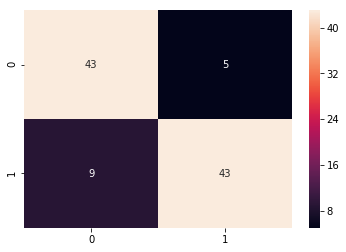

In [50]:
# BY IMPORTING THE CLASSIFICATION REPORT AND CONFUSION MATRIX IT'S POSSIBLE TO SEE HOW WELL THE MODEL WORKED
# THIS WORKS BY COMPARING THE ORIGINAL TEST DATA PREDUCTIONS WITH THE PREDICTIONS BASED ON THE MODEL
# 86 OBSERVATIONS FROM THE TEST DATA WERE PROPERLY CLASSIFIED

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
# THE CLASSIFICATION REPORT CORROBORATES THESE RESULTS, SHOWING ~ 86% PRECISION

In [57]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.90      0.83      0.86        52

   micro avg       0.86      0.86      0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [61]:
classifier.coef_

array([[2.74794912, 2.33917313]])

In [62]:
classifier.intercept_

array([-0.08889502])

# STEP #6: VISUALIZING TRAINING AND TESTING DATASETS

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


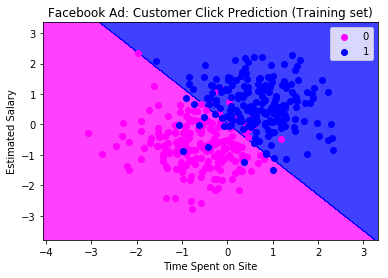

In [51]:
# FINALLY, I VISUALIZED THE RESULTS 
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Facebook Ad: Customer Click Prediction (Training set)')
plt.xlabel('Time Spent on Site')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()